In [20]:
from long_short_term_memory.lstm_prediction_model import Lstm_prediction_model
import numpy as np

In [21]:
featrue_dim = 6
num_data_points = 600
num_train_data_points = int(num_data_points*0.7)

data = np.array([[(-1)**i*(j/10)*(i+np.cos(j/10)) + 100 for i in range(featrue_dim)] for j in range(num_data_points)])
#data = np.array([[(-1)**i*(j/10)*(i+np.cos(j/50)) + 100 + np.cos(j/10) for i in range(featrue_dim)] for j in range(num_data_points)])


look_back = 150

lstm = Lstm_prediction_model(data, {"look_back": look_back, "feature_dim": featrue_dim})
print(data.shape)
print(data[0:10])

(600, 6)
[[101.         101.         101.         101.         101.
  101.        ]
 [101.09498417 100.79502416 101.29498417 100.59502416 101.49498417
  100.39502416]
 [101.1799066  100.58022656 101.5799066  100.18022656 101.9799066
   99.78022656]
 [101.25479665 100.35587633 101.85479665  99.75587633 102.45479665
   99.15587633]
 [101.31978168 100.12234031 102.11978168  99.32234031 102.91978168
   98.52234031]
 [101.37508464  99.88008048 102.37508464  98.88008048 103.37508464
   97.88008048]
 [101.4210208   99.62965043 102.6210208   98.42965043 103.8210208
   97.22965043]
 [101.45799338  99.37169099 102.85799338  97.97169099 104.25799338
   96.57169099]
 [101.48648854  99.10692488 103.08648854  97.50692488 104.68648854
   95.90692488]
 [101.50706929  98.83615064 103.30706929  97.03615064 105.10706929
   95.23615064]]


In [22]:
lstm.initialize_model()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 6)                 312       
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
Total params: 354
Trainable params: 354
Non-trainable params: 0
_________________________________________________________________


In [23]:
lstm.create_dataset()

(450, 150, 6) (450, 6)


In [24]:
lstm.load_lstm_model("lstm_model")

In [25]:
lstm.train_model(epochs=200, batch_size=20)

Epoch 1/200
23/23 - 1s - loss: 1.0525e-04
Epoch 2/200
23/23 - 1s - loss: 2.9220e-05
Epoch 3/200
23/23 - 1s - loss: 1.8384e-05
Epoch 4/200
23/23 - 1s - loss: 1.4616e-05
Epoch 5/200
23/23 - 1s - loss: 1.4364e-05
Epoch 6/200
23/23 - 1s - loss: 1.5562e-05
Epoch 7/200
23/23 - 1s - loss: 1.4117e-05
Epoch 8/200
23/23 - 1s - loss: 1.3697e-05
Epoch 9/200
23/23 - 1s - loss: 1.3909e-05
Epoch 10/200
23/23 - 1s - loss: 1.4316e-05
Epoch 11/200
23/23 - 1s - loss: 1.3276e-05
Epoch 12/200
23/23 - 1s - loss: 1.4371e-05
Epoch 13/200
23/23 - 1s - loss: 1.3728e-05
Epoch 14/200
23/23 - 1s - loss: 1.3126e-05
Epoch 15/200
23/23 - 1s - loss: 1.4215e-05
Epoch 16/200
23/23 - 1s - loss: 1.3714e-05
Epoch 17/200
23/23 - 1s - loss: 1.4393e-05
Epoch 18/200
23/23 - 1s - loss: 1.2077e-05
Epoch 19/200
23/23 - 1s - loss: 1.3129e-05
Epoch 20/200
23/23 - 1s - loss: 1.2565e-05
Epoch 21/200
23/23 - 1s - loss: 1.2151e-05
Epoch 22/200
23/23 - 1s - loss: 1.2556e-05
Epoch 23/200
23/23 - 1s - loss: 1.3777e-05
Epoch 24/200
23/23 -

In [26]:
i = num_train_data_points - look_back
pred_vec = []
x  = np.array(data[i:i+look_back])
for i in range(num_train_data_points - look_back, num_data_points - look_back): 
    #print(x[i-70+look_back:].shape)
    #print(np.array([x[i-70+look_back:]]).shape)
    predict = lstm.predict(np.array([x[i-num_train_data_points+look_back:]]))
    #print(predict.shape)
    x = np.append(x, predict, axis=0)
    
    #print(x.shape)
    pred_vec.append(predict[0])

true_ = data[num_train_data_points:]

pred_vec = np.array(pred_vec)

print(pred_vec.shape)
print(true_.shape)

mape = 100*np.sum(np.abs(np.divide(predict - true_, true_)))/featrue_dim/num_data_points
print(mape, "%")

(180, 6)
(180, 6)
46.874668151031095 %


In [27]:
lstm.save_lstm_model()

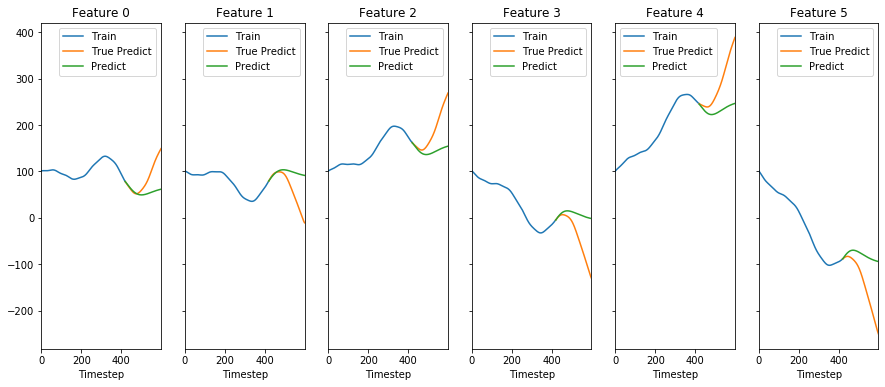

In [28]:
from plot.plot_helper_functions import plot_features_with_prediction

fig = plot_features_with_prediction(data=data[:num_train_data_points], prediction=pred_vec, true_predictions=true_, use_true_predictions=True)
#fig = plot_features_with_prediction(data=data[:80], prediction=data[79:])


In [19]:
lstm.save_lstm_model()

In [8]:

lstm2 = Lstm_prediction_model(data, {"look_back": look_back})

lstm2.initialize_model()

lstm2.create_advanced_dataset()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 5)                 220       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 30        
Total params: 250
Trainable params: 250
Non-trainable params: 0
_________________________________________________________________
(89, 3, 5) (89, 5)


In [9]:
lstm2.train_model(epochs=50, batch_size=10)

Epoch 1/50
9/9 - 0s - loss: 0.5763
Epoch 2/50
9/9 - 0s - loss: 0.5214
Epoch 3/50
9/9 - 0s - loss: 0.4748
Epoch 4/50
9/9 - 0s - loss: 0.4307
Epoch 5/50
9/9 - 0s - loss: 0.3921
Epoch 6/50
9/9 - 0s - loss: 0.3566
Epoch 7/50
9/9 - 0s - loss: 0.3222
Epoch 8/50
9/9 - 0s - loss: 0.2883
Epoch 9/50
9/9 - 0s - loss: 0.2559
Epoch 10/50
9/9 - 0s - loss: 0.2227
Epoch 11/50
9/9 - 0s - loss: 0.1885
Epoch 12/50
9/9 - 0s - loss: 0.1544
Epoch 13/50
9/9 - 0s - loss: 0.1243
Epoch 14/50
9/9 - 0s - loss: 0.0964
Epoch 15/50
9/9 - 0s - loss: 0.0764
Epoch 16/50
9/9 - 0s - loss: 0.0576
Epoch 17/50
9/9 - 0s - loss: 0.0476
Epoch 18/50
9/9 - 0s - loss: 0.0402
Epoch 19/50
9/9 - 0s - loss: 0.0359
Epoch 20/50
9/9 - 0s - loss: 0.0332
Epoch 21/50
9/9 - 0s - loss: 0.0314
Epoch 22/50
9/9 - 0s - loss: 0.0302
Epoch 23/50
9/9 - 0s - loss: 0.0291
Epoch 24/50
9/9 - 0s - loss: 0.0281
Epoch 25/50
9/9 - 0s - loss: 0.0272
Epoch 26/50
9/9 - 0s - loss: 0.0264
Epoch 27/50
9/9 - 0s - loss: 0.0256
Epoch 28/50
9/9 - 0s - loss: 0.0249
E

In [14]:
i = 100 - look_back - 1
predict = lstm2.predict(np.array([data[i:i+look_back]]))

true_ = data[i+look_back]

print(predict[0])
print(true_)


mape = 100*np.sum(np.divide(predict - true_, true_))/5.
print(mape, "%")

NameError: name 'lstm2' is not defined

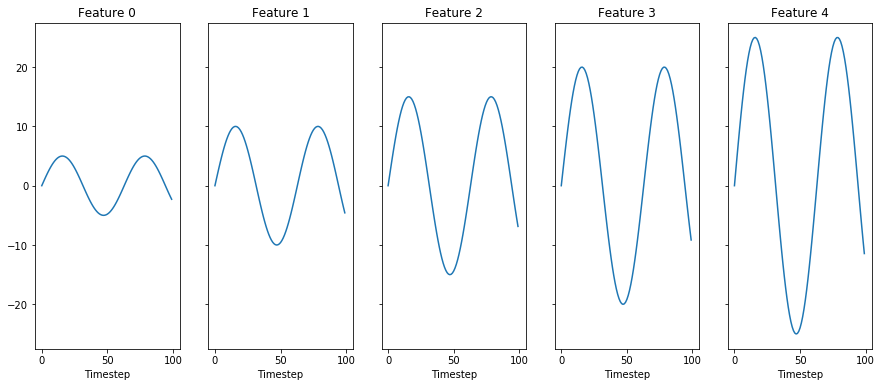

In [ ]:
from plot.plot_helper_functions import plot_features_with_prediction

fig = plot_features_with_prediction(data=data, prediction=predict, true_predictions=np.expand_dims(true_, axis=0))
